# 干涉及衍射成像仿真

In [20]:
import pimms.optics as op
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as mtri
reload(op)
# 简单卡氏系统单色光理想成像条件下的衍射极限点扩展函数仿真
tel=op.CassegrainReflector(detector_n=512,detector_fov=np.deg2rad(1./3600))
opn=op.OpticalPathNetwork(tel)
src=op.LightSource((0.,np.deg2rad(0./3600),np.inf),wavelength=5e-7)
dat=opn.image(src,tel.get_detectors()[0],1e-3,min_samplings=10000,batch_rays=10000,collect_runtime_data=True,verbose=True)
I=np.abs(tel.get_detectors()[0].amplitude_map)**2.

Re-calibrate the field of view...
  Batch 0: 9770 object rays traced at exit.
  Batch 0: 9770 reference rays traced at exit.
  Batch 0: 9770 ray-pairs traced at exit.
  Batch 0: 9770 points sampled at pupil, S-stat: 6.78E-20 (min), 1.34E-16 (avg), 6.97E-16 (max).
  Batch 1: 9727 object rays traced at exit.
  Batch 1: 9727 reference rays traced at exit.
  Batch 1: 9727 ray-pairs traced at exit.
  Batch 1: 9727 points sampled at pupil, S-stat: 0.00E+00 (min), 1.34E-16 (avg), 7.12E-16 (max).
Triangular beam analyzing on entrance 0...
  Entrance 0: 38900 triangles constructed.
  Entrance 0: 38871 triangles selected.
  Entrance 0: triangle areas on wavefront at entrance 9.01E-09 (min), 6.99E-04 (max), 7.62E-05 (avg), 6.71E-05 (std).
  Entrance 0: triangle areas on wavefront at exit 9.01E-11 (min), 6.99E-06 (max), 7.63E-07 (avg), 6.71E-07 (std).
  Entrance 0: beam compressing from entrance to exit 1.00E+02 (min), 1.00E+02 (max), 1.00E+02 (avg), 1.99E-04 (std).
  Entrance 0: photons per ray o

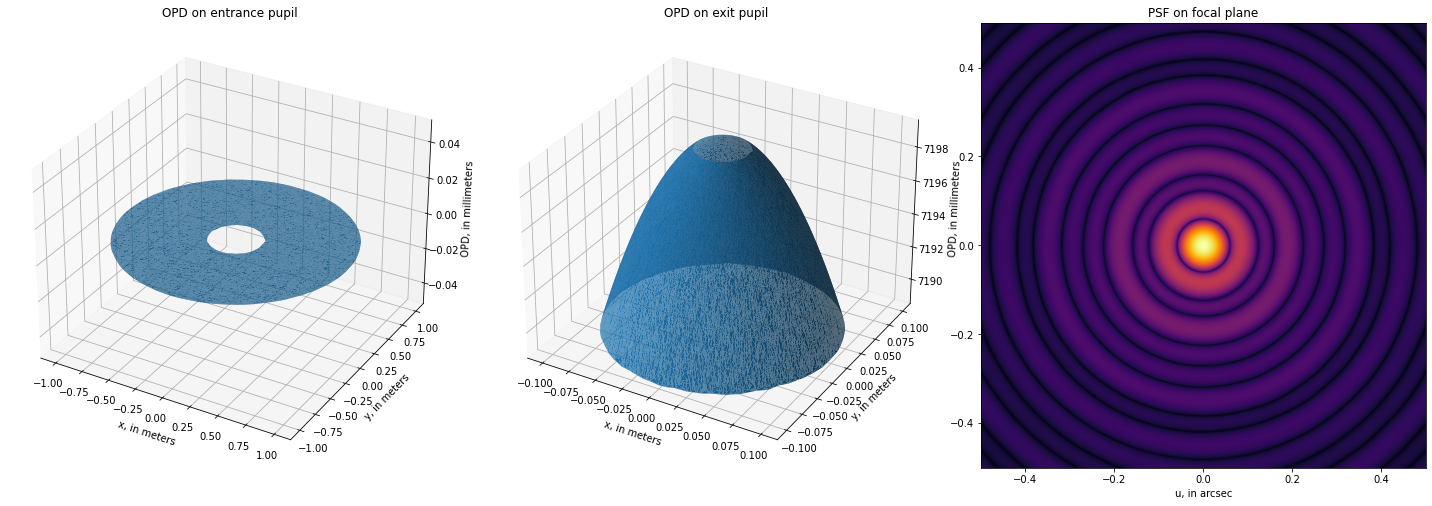

In [48]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(131,projection='3d')
trig=mtri.Triangulation(
    dat['object_rays_at_entrance']['position'][:,0],
    dat['object_rays_at_entrance']['position'][:,1],
    dat['TBA_entrance_0']['delaunay_triangles_initial'].simplices)
trig.set_mask(dat['TBA_entrance_0']['delaunay_triangles_mask'])
ax.plot_trisurf(trig,1e3*dat['object_rays_at_entrance']['distance'])
ax.set_title('OPD on entrance pupil')
ax.set_xlabel('x, in meters')
ax.set_ylabel('y, in meters')
ax.set_zlabel('OPD, in millimeters')
ax=fig.add_subplot(132,projection='3d')
trig.x=dat['object_rays_at_exit']['position'][:,0]
trig.y=dat['object_rays_at_exit']['position'][:,1]
ax.plot_trisurf(trig,1e3*dat['object_rays_at_exit']['distance'])
ax.set_title('OPD on exit pupil')
ax.set_xlabel('x, in meters')
ax.set_ylabel('y, in meters')
ax.set_zlabel('OPD, in millimeters')
ax=fig.add_subplot(133)
# tel.parts[0]是入瞳面、虚拟平面
# tel.parts[1]是主镜面、抛物面，f为其主焦距
# tel.parts[2]是副镜面、双曲面，f为其近焦距，g为其远焦距
# tel.parts[3]是焦平面探测器、平面
da=-np.rad2deg(np.arctan(.5*tel.parts[3].a/tel.parts[2].g*tel.parts[2].f/tel.parts[1].f))*3600.
ax.imshow(I,norm=colors.PowerNorm(.2,0.,np.max(I)),cmap='inferno',extent=(-da,da,-da,da))
ax.set_title('PSF on focal plane')
ax.set_xlabel('u, in arcsec')
#ax.set_ylabel('v, in arcsec')
plt.tight_layout()

In [ ]:
sim=op.SIM(detector_n=128,detector_fov=np.deg2rad(5./3600),detector_a=.01,init_b=10.)
opn=op.OpticalPathNetwork(sim)
imap=np.zeros((128,128),dtype='complex128')
for wl in np.arange(5e-6,15e-6,1e-7):
    src=op.LightSource((0.,np.deg2rad(.01/3600),np.inf),wavelength=wl)
    dopd=np.random.normal(0.,3e-6)
    sim.collectors[0].move([dopd,0.,0.])
    sim.delaylines[0].move([0.,0.,dopd/2.])
    win,wout,m=opn.image(src,sim.get_detectors()[0],1e-3,min_samplings=500,batch_rays=500,verbose=False)
    imap+=np.abs(sim.get_detectors()[0].amplitude_map)**2.
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
ax.imshow(np.abs(imap),cmap='gray_r')
plt.tight_layout()

fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(
    wout['position'][:,0],
    wout['position'][:,1],
    wout['distance'][:]+np.linalg.norm((wout['position']-np.reshape(sim.get_detectors()[0].p,(-1,3))),axis=-1))
ax.view_init(0.,-90.)

-0.5000000000969559